<a href="https://colab.research.google.com/github/adnan-ullah/enigma_AI_lab/blob/main/burn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os        
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import PIL
import PIL.Image
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import pathlib
import splitfolders


In [3]:
base_ds = '/content/drive/MyDrive/Dataset_Chatbot/Burning_dataset/seg_train/seg_train'
base_ds = pathlib.Path(base_ds)

splitfolders.ratio(base_ds, output='imgs', seed=123, ratio=(.7,.15,.15), group_prefix=None)


first_deg = [fn for fn in os.listdir(f'{base_ds}/first_deg') if fn.endswith('.jpg')]
second_deg = [fn for fn in os.listdir(f'{base_ds}/second_deg') if fn.endswith('.jpg')]
third_deg = [fn for fn in os.listdir(f'{base_ds}/third_deg') if fn.endswith('.jpg')]

burn_degrees = [first_deg, second_deg, third_deg]
burn_degrees_classes = []
for i in os.listdir('imgs/train'):
    burn_degrees_classes+=[i]
burn_degrees_classes.sort()



Copying files: 3613 files [01:02, 58.05 files/s] 


Total images: 3613
Total number of classes: 3
Total first_deg images: 1479
Total second_deg images: 1463
Total third_deg images: 671


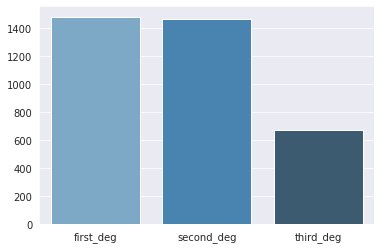

In [4]:
import seaborn as sns
image_count = len(list(base_ds.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(burn_degrees_classes)}')
count = 0
rice_count = []
for x in burn_degrees_classes:
  print(f'Total {x} images: {len(burn_degrees[count])}')
  rice_count.append(len(burn_degrees[count]))
  count += 1

sns.set_style('darkgrid')
sns.barplot(x=burn_degrees_classes, y=rice_count, palette="Blues_d")
plt.show()

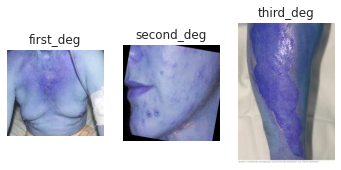

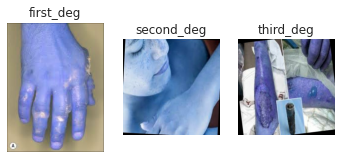

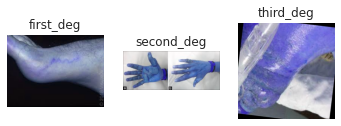

In [5]:
import random
import cv2

def load_random_img(dir, label):
  plt.figure(figsize=(10,10))
  i=0
  for label in burn_degrees_classes:
    i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

for i in range(3):
  load_random_img(base_ds, burn_degrees_classes)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [20]:
batch_size = 64
img_height, img_width = 128, 128
input_shape = (img_height, img_width, 3)

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#splits data into training and testing(validation) sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)
datagen = ImageDataGenerator(rescale=1./255)

#training data
train_generator = train_datagen.flow_from_directory(
    # Source directory
    '/content/drive/MyDrive/Dataset_Chatbot/Burning_dataset/seg_train/seg_train',
    target_size=(img_height, img_width),  # Resizes images
    batch_size=batch_size,
    class_mode='categorical', subset='training')

test_generator = train_datagen.flow_from_directory(
    # Source directory
    '/content/drive/MyDrive/Dataset_Chatbot/Burning_dataset/seg_test/seg_test/',
    target_size=(img_height, img_width),  # Resizes images
    batch_size=batch_size, shuffle=False,
    class_mode='categorical', subset='validation')


#Testing data
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset_Chatbot/Burning_dataset/seg_valid/seg_valid',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
  )  # set as validation data


Found 2712 images belonging to 3 classes.
Found 65 images belonging to 3 classes.
Found 226 images belonging to 3 classes.


In [22]:
# #test model 1
# from tensorflow.keras.optimizers import RMSprop

# model = tf.keras.models.Sequential()
# model.add( tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(img_height,img_width,3)))
# model.add( tf.keras.layers.MaxPool2D(2,2))
# model.add( keras.layers.Dropout(0.2))

# model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add( keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
# model.add(tf.keras.layers.MaxPool2D(2,2))
# model.add(tf.keras.layers.Dropout(0.3))

# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(64,activation='relu'))
# model.add(tf.keras.layers.Dropout(0.5))

# model.add(tf.keras.layers.Dense(3,activation='softmax'))

In [23]:

# model=Sequential()

# #model.add(Lambda(standardize,input_shape=(28,28,1)))    
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(img_height,img_width,3)))
# model.add(tf.keras.layers.Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
# model.add( tf.keras.layers.MaxPool2D(2,2))
# model.add(tf.keras.layers.BatchNormalization())

# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(tf.keras.layers.Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add( tf.keras.layers.MaxPool2D(2,2))
# model.add(tf.keras.layers.BatchNormalization())    

# model.add(tf.keras.layers.Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
# model.add( tf.keras.layers.MaxPool2D(2,2))
# model.add(tf.keras.layers.BatchNormalization())
    
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512,activation="relu"))
    
# model.add(tf.keras.layers.Dense(3,activation="softmax"))
    
# model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
vgg16 = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
vgg16.trainable = False
inputs = tf.keras.Input(input_shape)
x = vgg16(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)
model_vgg16 = tf.keras.Model(inputs, x)


model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
checkpointer = ModelCheckpoint(filepath='saved_models/model_vgg16.hdf5', 
                               monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [ ]:
history = model_vgg16.fit(train_generator, epochs = 12, validation_data = validation_generator, callbacks=callbacks)

Epoch 1/12
43/43 [==============================] - ETA: 0s - loss: 0.9974 - accuracy: 0.4978 
Epoch 1: val_accuracy improved from -inf to 0.61062, saving model to saved_models/model_vgg16.hdf5
43/43 [==============================] - 544s 13s/step - loss: 0.9974 - accuracy: 0.4978 - val_loss: 0.8647 - val_accuracy: 0.6106 - lr: 0.0010
Epoch 2/12
43/43 [==============================] - ETA: 0s - loss: 0.8413 - accuracy: 0.5837 
Epoch 2: val_accuracy improved from 0.61062 to 0.65929, saving model to saved_models/model_vgg16.hdf5
43/43 [==============================] - 504s 12s/step - loss: 0.8413 - accuracy: 0.5837 - val_loss: 0.8026 - val_accuracy: 0.6593 - lr: 0.0010
Epoch 3/12
43/43 [==============================] - ETA: 0s - loss: 0.7685 - accuracy: 0.6401 
Epoch 3: val_accuracy did not improve from 0.65929
43/43 [==============================] - 505s 12s/step - loss: 0.7685 - accuracy: 0.6401 - val_loss: 0.7535 - val_accuracy: 0.6460 - lr: 0.0010
Epoch 4/12
43/43 [=============

In [29]:
from keras.models import load_model
model = load_model('/content/saved_models/model_vgg16.hdf5')

In [30]:
print(model)

In [ ]:
#Model fitting for a number of epochs
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

history = model.fit(
   train_generator,
    steps_per_epoch = len(train_generator),
     validation_data = validation_generator,
                              validation_steps=len(validation_generator),
    callbacks=callbacks,
     epochs = 12,
     verbose="auto",
  
)

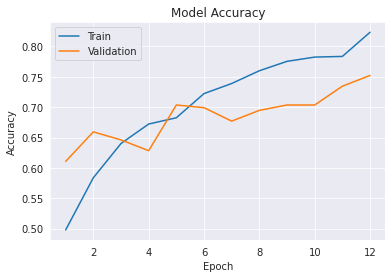

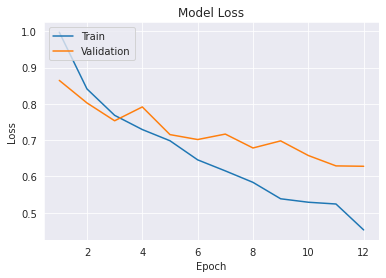

[0.49778762459754944, 0.5837020874023438, 0.6401180028915405, 0.6721976399421692, 0.6825221180915833, 0.7223451137542725, 0.73893803358078, 0.7599557638168335, 0.7754424810409546, 0.7824483513832092, 0.7835545539855957, 0.8233776092529297]
[0.6106194853782654, 0.6592920422554016, 0.6460176706314087, 0.6283186078071594, 0.7035398483276367, 0.6991150379180908, 0.6769911646842957, 0.6946902871131897, 0.7035398483276367, 0.7035398483276367, 0.7345132827758789, 0.752212405204773]


In [32]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()
plotLearningCurve(history,12)

print(history.history['accuracy'])
print(history.history['val_accuracy'])

In [33]:
#TESTING PROCESSING
test_generator1 = train_datagen.flow_from_directory(
    # Source directory
    '/content/drive/MyDrive/Dataset_Chatbot/Burning_dataset/seg_train/seg_train/',
    target_size=(128, 128),  # Resizes images
    batch_size=64,
    class_mode='categorical', subset='validation')


score = model.evaluate(test_generator, verbose=1)
print(f'Model VGG16 Loss: {score[0]}, Accuracy: {score[1]*100}')

Found 901 images belonging to 3 classes.
2/2 [==============================] - 12s 187ms/step - loss: 1.0600 - accuracy: 0.6000
Model VGG16 Loss: 1.060015320777893, Accuracy: 60.00000238418579


2/2 [==============================] - 11s 187ms/step


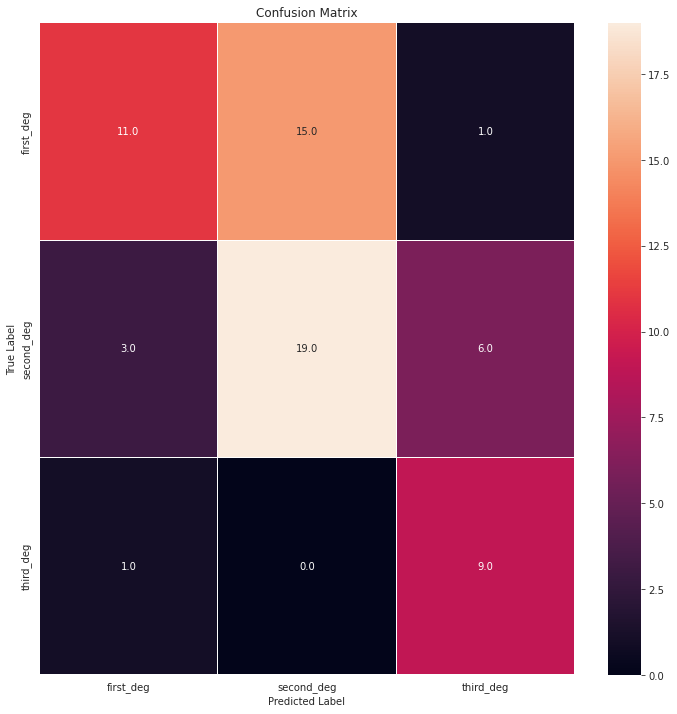

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_generator.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_generator.class_indices)
ax.yaxis.set_ticklabels(burn_degrees_classes)
plt.title("Confusion Matrix")
plt.show()

In [35]:
report = classification_report(test_generator.classes, y_pred, target_names=burn_degrees_classes, output_dict=True)
df2 = pd.DataFrame(report).transpose()
df2

,precision,recall,f1-score,support
first_deg,0.407407,0.733333,0.523810,15.0
second_deg,0.678571,0.558824,0.612903,34.0
third_deg,0.900000,0.562500,0.692308,16.0
accuracy,0.600000,0.600000,0.600000,0.6
macro avg,0.661993,0.618219,0.609673,65.0
weighted avg,0.670501,0.600000,0.611889,65.0


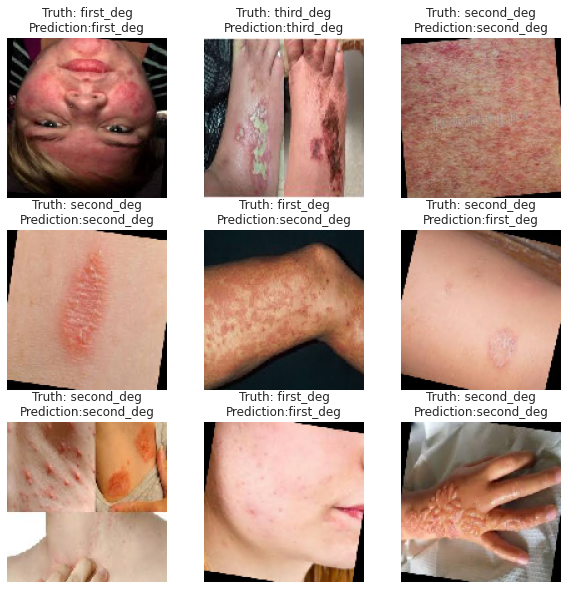

In [36]:
plt.figure(figsize=(10, 10))
x, label= train_generator.next()
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = model(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = burn_degrees_classes[np.argmax(score)]
    plt.title(f'Truth: {burn_degrees_classes[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')